In [118]:
#importing core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing essential libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

#importing Machine learning libraries
from sklearn.linear_model import LogisticRegression

In [127]:
#importing and reading dataset

dataset = pd.read_csv('student.csv', sep=',')
dataset['total_grades'] = (dataset['G1']+dataset['G2']+dataset['G3'])/3
dataset=dataset.drop(['G1', 'G2', 'G3'], axis=1)
dataset


,school,sex,age,address,famsize,Pstatus,Fedu,Medu,Fjob,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,1,absences,total_grades
0,1,0,18,1,0,0,4,4,0,3,...,0,0,4,3,4,1,1,3,4,7.333333
1,1,0,17,1,0,1,1,1,0,4,...,1,0,5,3,3,1,1,3,2,10.333333
2,1,0,15,1,1,1,1,1,0,4,...,1,0,4,3,2,2,3,3,6,12.333333
3,1,0,15,1,0,1,4,2,1,2,...,1,1,3,2,2,1,1,5,0,14.000000
4,1,0,16,1,0,1,3,3,4,4,...,0,0,4,3,2,1,2,5,0,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,19,0,0,1,2,3,2,4,...,1,0,5,4,2,1,2,5,4,10.333333
645,0,0,18,1,1,1,3,1,3,2,...,1,0,4,3,4,1,1,1,4,15.333333
646,0,0,18,1,0,1,1,1,4,4,...,0,0,1,1,1,1,1,5,6,10.666667
647,0,1,17,1,1,1,3,1,2,2,...,1,0,2,4,5,3,4,2,6,10.000000


In [129]:
#defining function for categorizing grades into 3

def marks(total_grades):
    if(total_grades<7):
        return(0)
    elif(total_grades>=7 and total_grades<14):
        return(1)
    elif(total_grades>14):
        return(2)
dataset['grades'] = dataset['total_grades'].apply(marks)
dataset['grades'] = dataset['grades'].fillna(0)
dataset['grades'] = dataset['grades'].astype(int)

del dataset['total_grades']

In [130]:
#Declaration of dependent variable
X=dataset[['school', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']]
       
#Declaration of independent variable
y=dataset['grades'].astype('category')


In [131]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

In [132]:
#training the model using linear regression as classifier 
regressor = LogisticRegression()

regressor.fit(X_train, y_train)

/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
#prediction score
r_score = regressor.score(X_test,y_test)

#printing output
print("Regression = ",r_score*100)

Regression =  66.92307692307692


<AxesSubplot:>

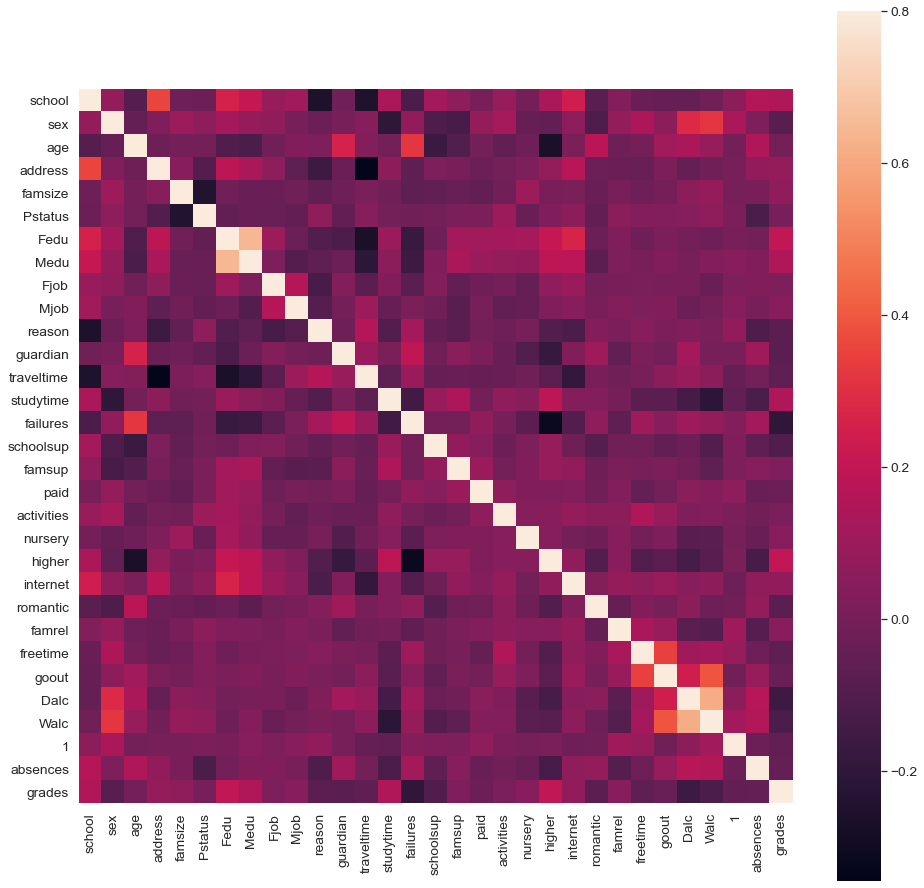

In [134]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)

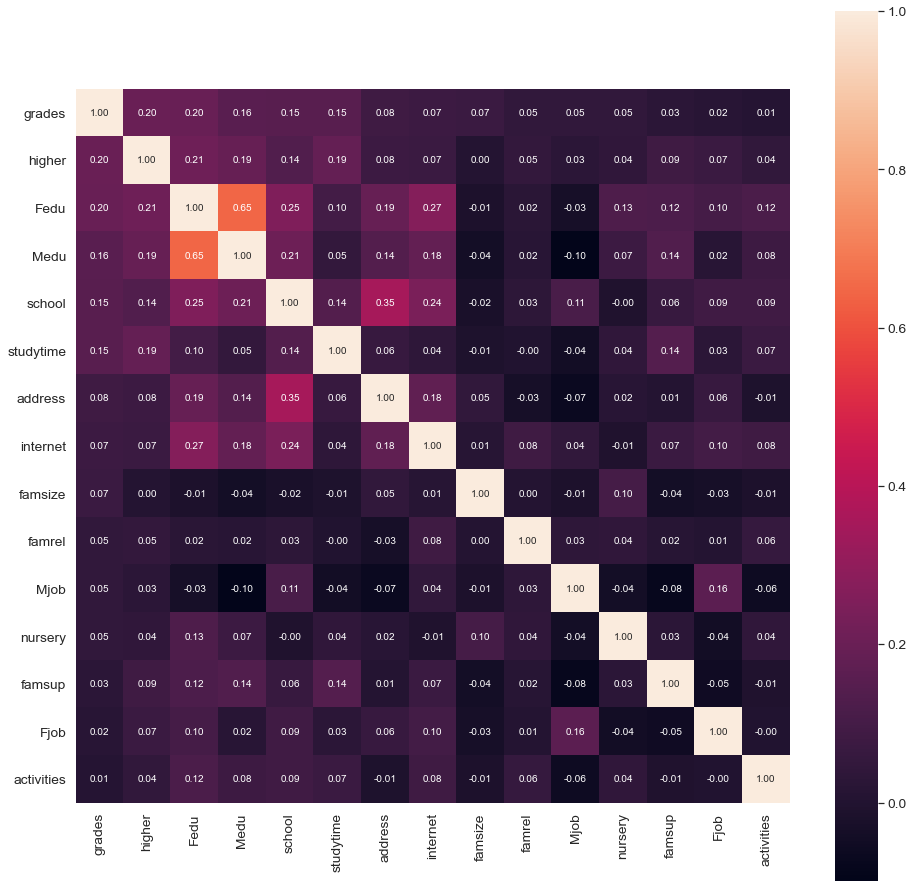

In [138]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(15, 'grades')['grades'].index
correlation_matrix = np.corrcoef(dataset[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [144]:
#Declaration of dependent variable
X=dataset[['Medu', 'Fedu', 'studytime', 'higher', 'school', 'address', 'internet', 
            'studytime', 'nursery', 'famsize', 'famrel']]
       
#Declaration of independent variable
y=dataset['grades'].astype('category')
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)
regressor = LogisticRegression()

regressor.fit(X_train, y_train)
#prediction score
r_score = regressor.score(X_test,y_test)

#printing output
print("Regression = ",r_score*100)

Regression =  70.0


/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
